In [5]:
from tensorflow.keras.datasets import reuters



10000
87
10000
145
[ 3  4  3 ... 25  3 25]
[ 3  4  3 ... 25  3 25]
(8982,)
Epoch 1/20
16/16 [==============================] - 1s 56ms/step - loss: 2.8582 - accuracy: 0.4359 - val_loss: 1.8809 - val_accuracy: 0.6370
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 1.7254 - accuracy: 0.6453 - val_loss: 1.4175 - val_accuracy: 0.6850
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.3592 - accuracy: 0.7072 - val_loss: 1.2405 - val_accuracy: 0.7120
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 1.1595 - accuracy: 0.7413 - val_loss: 1.1485 - val_accuracy: 0.7350
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 1.0043 - accuracy: 0.7701 - val_loss: 1.0840 - val_accuracy: 0.7550
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.8820 - accuracy: 0.7987 - val_loss: 1.0341 - val_accuracy: 0.7600
Epoch 7/20
16/16 [==============================] - 1s 47ms/step - loss: 0.7628

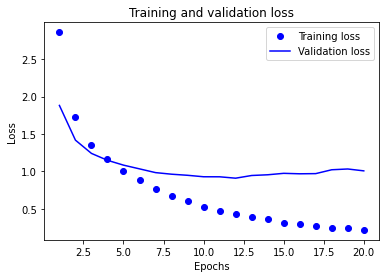

" \nx_val = x_train[:10000]\npartial_x_train = x_train[10000:]\n\n\ny_val = y_train[:10000]\npartial_y_train = y_train[10000:]\n\n\nhistory = model.fit (partial_x_train, partial_y_train, epochs=20,batch_size=20, validation_data=(x_val, y_val))\n\n\n \nimport matplotlib.pyplot as plt\nhistory_dict = history.history\n\n\nloss_values = history_dict['loss']\n\n\nval_loss_values = history_dict['val_loss']\n\n\n\n\n\nepochs = range(1, len(loss_values) + 1)\nplt.plot(epochs, loss_values, 'bo', label='Training loss with reg and dropout')\nplt.plot(epochs, val_loss_values, 'b', label='Validation loss with reg and dropout')\n\n\n\n\nplt.title('Training and validation loss')\nplt.xlabel('Epochs')\nplt.ylabel('Loss')\nplt.legend()\nplt.show()\nplt.clf() #Clears the figure\nacc = history_dict['acc']\nval_acc = history_dict['val_acc']\nplt.plot(epochs, acc, 'bo', label='Training acc')\nplt.plot(epochs, val_acc, 'b', label='Validation acc')\nplt.title('Training and validation accuracy')\nplt.xlabel('

In [28]:


import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import regularizers

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):#prend en paramètre une séquence de nombre et la transforme en liste de liste de nombre shape:(nombre d'exemple,10000)
    results = np.zeros((len(sequences), dimension))#len(sequence)=nombre d'exemples
    print(dimension)
    print(len(sequences[0]))
    for i in range (len (sequences)):
        for j in range (len (sequences [i])):
            results [i] [sequences [i] [j]] = 1.#on prend l'indice de cet entier et l'indice de cet entier dans le vecteur
    return results#ok


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

from tensorflow.keras.utils import to_categorical 
one_hot_train_labels = to_categorical(train_labels) 
one_hot_test_labels = to_categorical(test_labels)

print(train_labels)

y_train = np.asarray(one_hot_train_labels).astype('float32')
print(train_labels)
print(train_labels.shape)
y_test = np.asarray(one_hot_test_labels).astype('float32')
     
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.45, input_shape=(10000,)))
model.add(Dense(46, activation='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


x_val = x_train[:1000] 
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000] 
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
import matplotlib.pyplot as plt 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs = range(1, len(loss) + 1) 
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()




''' 
x_val = x_train[:10000]
partial_x_train = x_train[10000:]


y_val = y_train[:10000]
partial_y_train = y_train[10000:]


history = model.fit (partial_x_train, partial_y_train, epochs=20,batch_size=20, validation_data=(x_val, y_val))


 
import matplotlib.pyplot as plt
history_dict = history.history


loss_values = history_dict['loss']


val_loss_values = history_dict['val_loss']





epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss with reg and dropout')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss with reg and dropout')




plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf() #Clears the figure
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
'''


In [29]:
 #sklearn.metrics.classification_report(y_test, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')
from sklearn.metrics import classification_report
import numpy as np
Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(x_test)
print(classification_report(Y_test, y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.64      0.81      0.71       105
           2       0.76      0.65      0.70        20
           3       0.90      0.94      0.92       813
           4       0.79      0.88      0.84       474
           5       1.00      0.20      0.33         5
           6       0.92      0.86      0.89        14
           7       1.00      0.33      0.50         3
           8       0.74      0.66      0.69        38
           9       0.87      0.80      0.83        25
          10       0.90      0.90      0.90        30
          11     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
